In [150]:
#importing dependencies
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
PS = PorterStemmer()
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import seaborn as sns
STOPWORDS=set(stopwords.words('english'))
lemmatizer= WordNetLemmatizer()
import numpy as np

In [125]:
# importing dataframe 1
df1 = pd.read_csv('/home/ubuntu/Downloads/text_classification_corpus/cybersecurity_tweets.csv')

In [126]:
# importing dataframe 2
df2 = pd.read_csv('/home/ubuntu/Downloads/text_classification_corpus/not_cybersecurity_tweets.csv')

In [127]:
# combining the two dataframe
df = df1.append(df2,ignore_index = True)

In [128]:
# printing the information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    400000 non-null  object
 1   label   400000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.1+ MB


In [129]:
# returns description of the data in the DataFrame
df.describe(include='object')

,text
count,400000
unique,390161
top,Our Ddos service! Please use the grardstresser...
freq,149


In [130]:
# dropping duplicates here
df.drop_duplicates(inplace=True)

In [131]:
# checking the missing values
df.isna().sum()

text     0
label    0
dtype: int64

In [139]:
df['text'][300015]

'Irony is getting a phishing text about the Facebook outage to a phone number that was leaked by way of a Facebook dump https://t.co/QcwYPVXAMQ'

In [123]:
df

,label,Cleantext
0,1,ai robo adviser future financial advice datapr...
1,1,hacker causing havoc mexican banking system cy...
2,1,cve issue discovered mxgraph related diagram p...
3,1,protect online identity labourcyberattack cybe...
4,1,forensic acquisition shadow cyber sec cybersec...
...,...,...
300012,0,creating company data breach response plan dat...
300013,0,aviso para los usuarios de correo de aytomurci...
300014,0,npm obfuscated birthday like easter egg mistak...
300015,0,cpu spectre amd intel gigazine intelcpu


<AxesSubplot:xlabel='label', ylabel='count'>

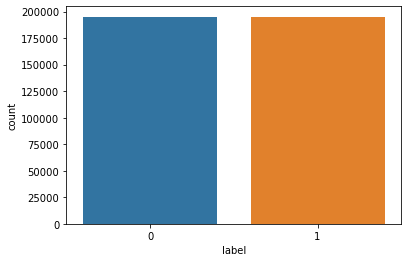

In [10]:
# checking the data is balanced or not
sns.countplot(x ='label', data = df)

In [11]:
# text preprcessing
def tokenize(text):
    
    text = re.sub(r'http\S+', '', text)

    text = re.sub("[^a-zA-Z]", " ", text.lower())#panctuations
    
    tokens = word_tokenize(text) #split text into words
    
    words = [w for w in tokens if w not in STOPWORDS] #remove stopwords
    
    lemmed_words = [lemmatizer.lemmatize(w) for w in words] #lemmatizing
    
    clean_tokens = []
    
    for i in lemmed_words: #appending all the lemmed words to clean_tokens
        clean_tokens.append(i)
        
    text = " ".join(clean_tokens) #joining text in cleaned tokens based on white spaces
    
    return text

In [12]:
# !pip install swifter

In [13]:
# text preprocessing
import swifter
df['Cleantext'] = df['text'].swifter.apply(lambda x: tokenize(x))

Pandas Apply:   0%|          | 0/390162 [00:00<?, ?it/s]

In [14]:
df['Cleantext'].tail(9)

399991    since pandemic orgs moved cloud based activity...
399992    polyswarm marketplace community network detect...
399993    creating company data breach response plan dat...
399994    receive free year ddos mitigation service sign...
399995    attacker test weak password purple fox malware...
399996    aviso para los usuarios de correo de aytomurci...
399997    npm obfuscated birthday like easter egg mistak...
399998              cpu spectre amd intel gigazine intelcpu
399999    new android banking malware named octo appeare...
Name: Cleantext, dtype: object

In [15]:
# dropping uncleaned data in the dataframe
df.drop(columns='text',inplace=True)

In [16]:
df

,label,Cleantext
0,1,ai robo adviser future financial advice datapr...
1,1,hacker causing havoc mexican banking system cy...
2,1,cve issue discovered mxgraph related diagram p...
3,1,protect online identity labourcyberattack cybe...
4,1,forensic acquisition shadow cyber sec cybersec...
...,...,...
399995,0,attacker test weak password purple fox malware...
399996,0,aviso para los usuarios de correo de aytomurci...
399997,0,npm obfuscated birthday like easter egg mistak...
399998,0,cpu spectre amd intel gigazine intelcpu


In [17]:
# printing the infromation about cleaned dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390162 entries, 0 to 399999
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   label      390162 non-null  int64 
 1   Cleantext  390162 non-null  object
dtypes: int64(1), object(1)
memory usage: 17.0+ MB


In [18]:
# description of the uncleaned dataframe
df.describe(include='object')

,Cleantext
count,390162
unique,299991
top,saman staan sterk tegen de vaccinatieplicht la...
freq,790


In [19]:
# remove the duplicates
df.drop_duplicates(inplace = True)

In [20]:
df

,label,Cleantext
0,1,ai robo adviser future financial advice datapr...
1,1,hacker causing havoc mexican banking system cy...
2,1,cve issue discovered mxgraph related diagram p...
3,1,protect online identity labourcyberattack cybe...
4,1,forensic acquisition shadow cyber sec cybersec...
...,...,...
399993,0,creating company data breach response plan dat...
399996,0,aviso para los usuarios de correo de aytomurci...
399997,0,npm obfuscated birthday like easter egg mistak...
399998,0,cpu spectre amd intel gigazine intelcpu


In [21]:
df.reset_index(inplace=True)
df.drop(columns='index',inplace=True)
df

,label,Cleantext
0,1,ai robo adviser future financial advice datapr...
1,1,hacker causing havoc mexican banking system cy...
2,1,cve issue discovered mxgraph related diagram p...
3,1,protect online identity labourcyberattack cybe...
4,1,forensic acquisition shadow cyber sec cybersec...
...,...,...
300012,0,creating company data breach response plan dat...
300013,0,aviso para los usuarios de correo de aytomurci...
300014,0,npm obfuscated birthday like easter egg mistak...
300015,0,cpu spectre amd intel gigazine intelcpu


<AxesSubplot:xlabel='label', ylabel='count'>

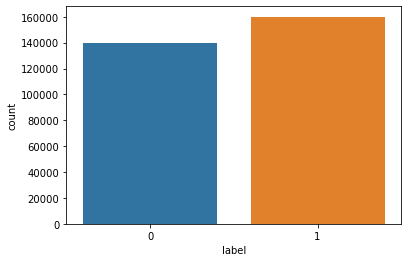

In [22]:
# checking the data is balanced or not
sns.countplot(x ='label', data = df)

In [117]:
# converting the text data into numerical data
vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features=100)
x = vectorizer.fit_transform(df['Cleantext']).toarray()

In [24]:
x

array([[0.        , 0.81628105, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.58834805, ..., 0.        , 0.        ,
        0.        ]])

In [25]:
y = df[['label']]
y

,label
0,1
1,1
2,1
3,1
4,1
...,...
300012,0
300013,0
300014,0
300015,0


In [74]:
import pickle

pickle.dump(vectorizer, open("tfidf.pickle", "wb"))

In [26]:
# spliting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70,stratify=y,random_state=25)

In [27]:
y_train.value_counts()

label
1        112024
0         97987
dtype: int64

In [28]:
y_test.value_counts()

label
1        48011
0        41995
dtype: int64

# Logistic Regreesion

In [29]:
# importing the Logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [30]:
# fit the train data into logistic regression model
lr.fit(x_train,y_train)

LogisticRegression()

In [31]:
# prediction for test data
lr_predict = lr.predict(x_test)


In [32]:
# importing metrics to summarize the performance of a classification algorithm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_roc_curve

In [33]:
confusion_matrix(y_test,lr_predict)

array([[41754,   241],
       [ 3227, 44784]])

In [34]:
print(classification_report(y_test,lr_predict))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     41995
           1       0.99      0.93      0.96     48011

    accuracy                           0.96     90006
   macro avg       0.96      0.96      0.96     90006
weighted avg       0.96      0.96      0.96     90006



# KNN


In [35]:
from sklearn.neighbors import KNeighborsClassifier 

In [36]:
nb = KNeighborsClassifier()

In [37]:
nb.fit(x_train,y_train)

KNeighborsClassifier()

In [38]:
nb_predict =nb.predict(x_test)

In [39]:
confusion_matrix(y_test,nb_predict)

array([[38996,  2999],
       [ 4582, 43429]])

In [40]:
print(classification_report(y_test,nb_predict))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     41995
           1       0.94      0.90      0.92     48011

    accuracy                           0.92     90006
   macro avg       0.92      0.92      0.92     90006
weighted avg       0.92      0.92      0.92     90006



In [41]:
accuracy_score(y_test,nb_predict)

0.9157722818478768

nb.fit(x_train,y_train)
plot_roc_curve(nb, x_test, y_test)

# decision tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dt = DecisionTreeClassifier()

In [44]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
dt_predict = dt.predict(x_test)

In [46]:
confusion_matrix(y_test,dt_predict)

array([[41164,   831],
       [ 2589, 45422]])

In [47]:
print(classification_report(y_test,dt_predict))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     41995
           1       0.98      0.95      0.96     48011

    accuracy                           0.96     90006
   macro avg       0.96      0.96      0.96     90006
weighted avg       0.96      0.96      0.96     90006



# xgboost

In [48]:
import xgboost as xgb

In [49]:
xg = xgb.XGBClassifier()

In [50]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [51]:
xg_predict = xg.predict(x_test)

In [52]:
print(classification_report(y_test,xg_predict))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     41995
           1       1.00      0.94      0.97     48011

    accuracy                           0.97     90006
   macro avg       0.97      0.97      0.97     90006
weighted avg       0.97      0.97      0.97     90006



In [53]:
accuracy_score(y_test,xg_predict)

0.9665244539252938

# Random forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rl_model = RandomForestClassifier()

In [56]:
rl_model.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
rl_pred=rl_model.predict(x_test)

In [58]:
print(classification_report(y_test,rl_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     41995
           1       0.99      0.95      0.97     48011

    accuracy                           0.97     90006
   macro avg       0.97      0.97      0.97     90006
weighted avg       0.97      0.97      0.97     90006



In [156]:
import pickle
# saving the trained model 
filename = 'rl_model.pkl'
pickle.dump(rl_model, open(filename, 'wb'))

In [73]:
# load the saved model
loaded_model = pickle.load(open('rf_model.pkl', 'rb'))
loaded_model.predict(x_test)

array([1, 1, 0, ..., 1, 0, 0])

# ADA Boost

In [59]:
from sklearn.ensemble import AdaBoostClassifier

In [60]:
ad_model = AdaBoostClassifier()

In [61]:
ad_model.fit(x_train,y_train)

AdaBoostClassifier()

In [62]:
ad_pred = ad_model.predict(x_test)

In [63]:
print(classification_report(y_test,ad_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     41995
           1       0.99      0.94      0.97     48011

    accuracy                           0.96     90006
   macro avg       0.96      0.97      0.96     90006
weighted avg       0.97      0.96      0.96     90006



# prediction

In [190]:
text='indian army'
# preprocess the text
ctext=tokenize(text)
ctext

'mental laxmi'

In [191]:
# loading tfidf model
tfidf = pickle.load(open('tfidf.pickle', 'rb'))

In [192]:
# converting text into numbers
vector=tfidf.transform([ctext])
vector

<1x100 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [193]:
# prediction of the vectors
rl_model.predict(vector)

array([0])

In [194]:
# predict the probability 

prediction = rl_model.predict(vector)

if prediction == 0:
    print('not cyber security tweets')
    
else:
    print('cyber security tweets')

not cyber security tweets


In [195]:
# prediction of the vectors
p = rl_model.predict_proba(vector)
p=p[:,1]

p

array([0.39008585])

In [196]:
rl_model.predict_proba(vector)

array([[0.60991415, 0.39008585]])